In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas_datareader as pdr


# Download historical stock data
ticker = "GWRE"
start_date = "2010-01-01"
end_date = "2023-11-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Select the closing prices
closing_prices = stock_data["Close"]
log_data = np.log(closing_prices).diff()

# Split the data into training and testing sets
train_data = closing_prices[:int(len(log_data) * 0.8)]
test_data = closing_prices[int(len(log_data) * 0.8):]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 2, 1))
model_fit = model.fit()

# Print AIC and BIC values
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)

# Forecast the stock prices using the ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(15, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas_datareader as pdr

In [1]:
import pandas_datareader as pdr
start_date='1990-01-01'
end_date='2023-11-01'
vix = pdr.DataReader('VIXCLS','fred',start_date,end_date)


In [2]:
vix.head()
  

,VIXCLS
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26


In [4]:
vix.diff()

,VIXCLS
DATE,
1990-01-02,NaN
1990-01-03,0.95
1990-01-04,1.03
1990-01-05,0.89
1990-01-08,0.15
...,...
2023-10-26,0.49
2023-10-27,0.59
2023-10-30,-1.52


In [5]:
vix_st = vix.diff(periods=1, axis=0)
vix_st

,VIXCLS
DATE,
1990-01-02,NaN
1990-01-03,0.95
1990-01-04,1.03
1990-01-05,0.89
1990-01-08,0.15
...,...
2023-10-26,0.49
2023-10-27,0.59
2023-10-30,-1.52


In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:


    

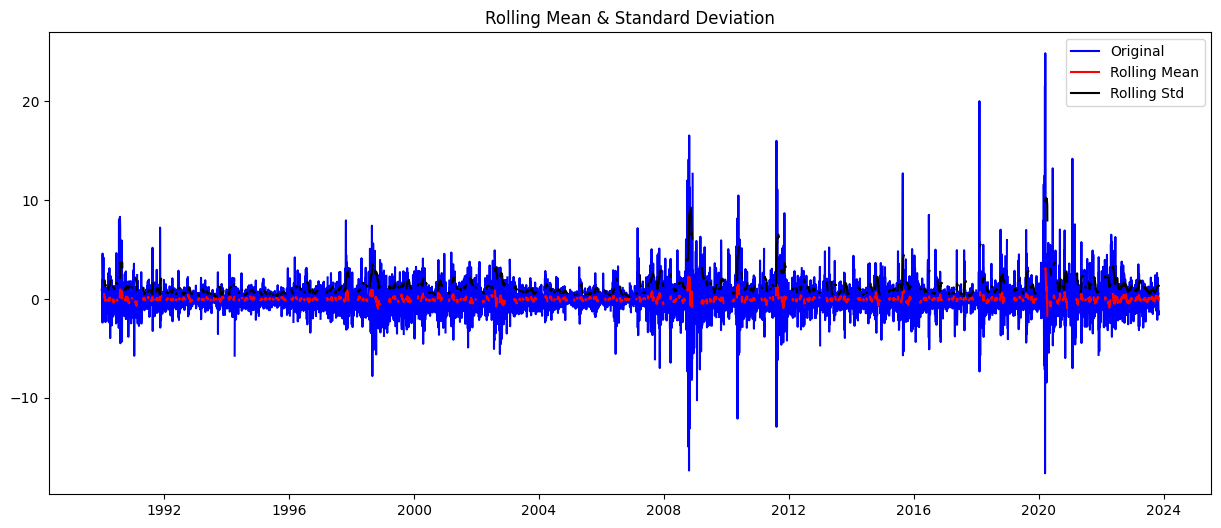

In [15]:

test_stationarity(vix_st)